<a href="https://colab.research.google.com/github/AccessDenied1/Q-Learning/blob/master/MDP_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0, -1.0, -0.16923076923076938, 0.3846153846153844, 0.7538461538461537, 1.0, 0]
policy
[0. 1. 1. 1. 1. 1. 0.]


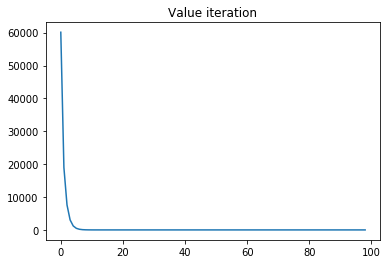

In [2]:
import numpy as np
import pylab as plt
n=5+2
R=np.zeros((n))
pol=np.zeros((n))
pr_l=np.zeros((n*n)).reshape((n,n))
pr_r=np.zeros((n*n)).reshape((n,n))
R[1]=-1.0
R[n-2]=1.0
x=0.0
y=0.0
class MDP_1D():
    def prob(self,s,p):
        if(s!=1 and s!=n-2):
            pr_l[s][s-1]=p
            pr_l[s][s+1]=1.0-p
            pr_r[s][s-1]=1.0-p
            pr_r[s][s+1]=p
    def mdp(self,V):
        for s in range(1,n-1):
            self.prob(s,0.6)
            #print s
            x=R[s]+(pr_l[s][s+1]*V[s+1]+pr_l[s][s-1]*V[s-1])
            y=R[s]+(pr_r[s][s+1]*V[s+1]+pr_r[s][s-1]*V[s-1])
            #print(x,y)
            if(x>y):
                V[s]=x
                pol[s]=0
            else:
                V[s]=y
                pol[s]=1
        return V
    def norm(self,v1,v2):
        su=0
        for i in range(n):
            su+=(v1[i]-v2[i])**2
        return np.sqrt(su)
o=MDP_1D()
V0=[0,56265,261235,-122556,-21156,-10,0]
v_f=[]
V_x=[]
for i in range(100):
    v1=o.mdp(V0)
    v_f.append(v1)
    V0=v1[:]
for i in range(99):
    V_x.append(o.norm(v_f[i],v_f[99]))
#print V_x
print(v_f[99])
plt.title("Value iteration")
plt.plot(V_x)
print("policy")
print(pol)
